# EmbedX: Multi-lingual Embedding Model

## Project Overview

- EmbedX is an Natural Language Processing project focused on developing and comparing different word embedding approaches across multiple languages. 
- The project aims to evaluate the effectiveness of various embedding techniques through practical applications in chatbot development and comprehensive comparative analysis.

## Key Components of this project

- **Part 1.** Multi-lingual Word2Vec Implementation
    - Focus on creating a model to produce Word2Vec embeddings for non-English languages.

- **Part 2.** RNN-based Embedding Architecture 
    - Development of a custom RNN architecture for embedding generation. 
    - Comparative analysis against standard Keras Word2Vec embeddings.

- **Part 3.** Chatbot Integration & Evaluation 
    - Development of an embedding-powered chatbot system.
    - Comparative testing between English and non-English embedding models
    - Performance benchmarking across different embedding sources


- **Part 4.** Embedding Quality Assessment
    - Comparative analysis of Word2Vec and RNN-based approaches
    - Implementation of multiple evaluation metrics


- **Part 5.** DNN Comparative Study
    - Implementation of a shallow DNN for embedding generation
    - Head-to-head comparison with RNN-based embeddings

## Priority Focus
- The core focus is on developing and optimizing the RNN-based embedding architecture, as this forms the foundation for subsequent comparative analyses and applications.

---

## Part 5. DNN Comparative Study
- Implementation of a shallow DNN for embedding generation
- Head-to-head comparison with RNN-based embeddings

### Approach

- Import necessary libraries

In [1]:
import copy
import pandas as pd
import numpy as np
from string import digits

import re
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import load_model
from indicnlp.tokenize import indic_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
hi_punct = ['!', '?', '|', '||']
sentences = []
with open("dataset/Panchtantra.txt", 'r', encoding="utf-8") as file_data: 
    
    sentence = ''
    paragraph_p = 0
    for l,line in enumerate(file_data): 
        
        # Remove unwanted characters
        line = line.strip() \
                    .replace('।', '') \
                    .replace('॥', '') \
                    .replace('\ufeff', '') \
                    .replace('\u200C', '') \
                    .replace('“', '') \
                    .replace('”', '') \
                    .replace('‘', '') \
                    .replace('’', '') \
                    .replace('—', '') \
                    .replace('-', '') \
                    .replace('$', '')
                    
        
        # One \n is just a carriage return. Two \n's means 
        # a new paragraph, start a new sentence
        if len(line) == 0:
            #print('empty line!')
            paragraph_p += 1
            if paragraph_p == 2:
                if 0 < len(sentence):
                    sentences.append(sentence)
                    sentence = ''
                paragraph_p = 0
            continue
        
        # detect sentence delimeters
        delimeters = []
        for c in hi_punct:
            line_copy = copy.copy(line)
            while -1 < line_copy.find(c):
                d = line_copy.find(c)
                delimeters.append(d)
                line_copy = line_copy[:d] + '_' + line_copy[d+1:]
                    
        delimeters.sort()

            
        # no sentence delimeters: keep appending
        if len(delimeters) == 0:
            sentence += line
            
        # detected sentence delimeter(s), terminate sentence
        else:
                
            last_index = 0
            for i in delimeters:
                sentence += line[last_index : i]
                sentences.append(sentence)

                sentence = ''
                last_index = i + 1
                    
            # at the end of the indexes traversal, add remaining words to next sentence     
            if last_index <= len(line):
                dangling = line[last_index :].strip()
                if 0 < len(dangling):
                    sentence = dangling
                    #print("seeding:", sentence)
                else:
                    sentence = ''
            else:
                sentence = ''


In [3]:
[(i, s) for i,s in enumerate(sentences)]

[(0,
  'पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहानियों का संग्रह है जिसके रचयिता आचार्य विष्णु शर्मा है पंचतंत्र की कहानी में बच्चोंके साथसाथ बड़े भी रुचि लेते हैं पंचतंत्र की कहानी के पीछे कोई ना कोई शिक्षा या मूल छिपा होता है जो हमें सीखदेती है पंचतंत्र की कहानी बच्चे बड़ी चाव से पढ़ते हैं तथा सीख लेते हैं पंचतंत्र की कछ कहानियां ऐसी भी है जोहिंदी में कहानी लेखन में दी जाती हैं तथा इसके साथसाथ कई परीक्षाओं में भी 80780 6 (9 कुछपाठयपृस्तक में दी होती है जो लिखने को आती हैं महत्वपूर्ण और आकर्षक 40 कहानियां इस ब्लॉग में दी गई हैं'),
 (1,
  'आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा पंचतंत्र संस्कत की नीति पर्तक के लेखक माने जाते हैं जब यह ग्रंथ बनकर तैयारहुआ तब विष्ण शर्मा की उम्र 40 सात्र थी विष्ण शर्मा दक्षिण भारत के महिलारोप्य नामक नगर में रहते थे एकराजा के 3 मर्ख पत्र थे जिनकी जिम्मेदारी विष्ण शर्मा को दे दी गई विष्ण शर्मा को यह पता था कि यह इतने मूर्ख हैंकि इनको प्राने तरीकों से नहीं पढ़ाया जा सकता तब उन्होंने जंत कथाओं के द्वारा पढ़ाने का निश्चय कियापंचतंत्र को पांच समूह म

In [4]:
sentences[:5]

['पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहानियों का संग्रह है जिसके रचयिता आचार्य विष्णु शर्मा है पंचतंत्र की कहानी में बच्चोंके साथसाथ बड़े भी रुचि लेते हैं पंचतंत्र की कहानी के पीछे कोई ना कोई शिक्षा या मूल छिपा होता है जो हमें सीखदेती है पंचतंत्र की कहानी बच्चे बड़ी चाव से पढ़ते हैं तथा सीख लेते हैं पंचतंत्र की कछ कहानियां ऐसी भी है जोहिंदी में कहानी लेखन में दी जाती हैं तथा इसके साथसाथ कई परीक्षाओं में भी 80780 6 (9 कुछपाठयपृस्तक में दी होती है जो लिखने को आती हैं महत्वपूर्ण और आकर्षक 40 कहानियां इस ब्लॉग में दी गई हैं',
 'आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा पंचतंत्र संस्कत की नीति पर्तक के लेखक माने जाते हैं जब यह ग्रंथ बनकर तैयारहुआ तब विष्ण शर्मा की उम्र 40 सात्र थी विष्ण शर्मा दक्षिण भारत के महिलारोप्य नामक नगर में रहते थे एकराजा के 3 मर्ख पत्र थे जिनकी जिम्मेदारी विष्ण शर्मा को दे दी गई विष्ण शर्मा को यह पता था कि यह इतने मूर्ख हैंकि इनको प्राने तरीकों से नहीं पढ़ाया जा सकता तब उन्होंने जंत कथाओं के द्वारा पढ़ाने का निश्चय कियापंचतंत्र को पांच समूह में बनाया गया 

In [5]:
sentences_p = pd.DataFrame(sentences)
sentences_p

,0
0,"पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहान..."
1,आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा ...
2,चालाक खटमलएक राजा के शयनकक्ष में मंदविसर्थिणी ...
3,"तो नहीं, उसका खून चूसने के लिए"
4,""" खेंटमल बोला, ""लेकिन मैं तम्हारा मेहमान है, म..."
...,...
81,सभी पशु पक्षी जब बरसात रुकने पर बाहर निकले तब ...
82,सभी का मन प्रसन्‍नता बत्तव अब झील मैं तैर रहे ...
83,शिक्षाधैर्य का फल मीठा होता हैचिड़ियाघर की सैर
84,अमन अपने मातापिता के साथ चिड़ियाघर की सैर करने...


In [6]:
sentences_p[0] = sentences_p[0].apply(lambda x: re.sub(r"([!#$%&\()*+,-./:;<=>?@[\\]^_`{|}~])", r" \1 ", x))

In [7]:
sentences_p[0]

0     पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहान...
1     आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा ...
2     चालाक खटमलएक राजा के शयनकक्ष में मंदविसर्थिणी ...
3                        तो नहीं, उसका खून चूसने के लिए
4     " खेंटमल बोला, "लेकिन मैं तम्हारा मेहमान है, म...
                            ...                        
81    सभी पशु पक्षी जब बरसात रुकने पर बाहर निकले तब ...
82    सभी का मन प्रसन्‍नता बत्तव अब झील मैं तैर रहे ...
83       शिक्षाधैर्य का फल मीठा होता हैचिड़ियाघर की सैर
84    अमन अपने मातापिता के साथ चिड़ियाघर की सैर करने...
85    अमन ने देखा वहां छोटेछोटे बच्चे आए हैंवह अपने ...
Name: 0, Length: 86, dtype: object

In [8]:
remove_digits = str.maketrans('', '', digits)
sentences_p[0] = sentences_p[0].apply(lambda x: x.translate(remove_digits))

In [9]:
sentences_p[0]

0     पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहान...
1     आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा ...
2     चालाक खटमलएक राजा के शयनकक्ष में मंदविसर्थिणी ...
3                        तो नहीं, उसका खून चूसने के लिए
4     " खेंटमल बोला, "लेकिन मैं तम्हारा मेहमान है, म...
                            ...                        
81    सभी पशु पक्षी जब बरसात रुकने पर बाहर निकले तब ...
82    सभी का मन प्रसन्‍नता बत्तव अब झील मैं तैर रहे ...
83       शिक्षाधैर्य का फल मीठा होता हैचिड़ियाघर की सैर
84    अमन अपने मातापिता के साथ चिड़ियाघर की सैर करने...
85    अमन ने देखा वहां छोटेछोटे बच्चे आए हैंवह अपने ...
Name: 0, Length: 86, dtype: object

In [10]:
# Remove quotes, saveguard commas:
sentences_p[0] = sentences_p[0].apply(lambda x: re.sub("'", '', x))

In [11]:
sentences_p[0]

0     पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहान...
1     आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा ...
2     चालाक खटमलएक राजा के शयनकक्ष में मंदविसर्थिणी ...
3                        तो नहीं, उसका खून चूसने के लिए
4     " खेंटमल बोला, "लेकिन मैं तम्हारा मेहमान है, म...
                            ...                        
81    सभी पशु पक्षी जब बरसात रुकने पर बाहर निकले तब ...
82    सभी का मन प्रसन्‍नता बत्तव अब झील मैं तैर रहे ...
83       शिक्षाधैर्य का फल मीठा होता हैचिड़ियाघर की सैर
84    अमन अपने मातापिता के साथ चिड़ियाघर की सैर करने...
85    अमन ने देखा वहां छोटेछोटे बच्चे आए हैंवह अपने ...
Name: 0, Length: 86, dtype: object

In [12]:
sentences_p[0] = sentences_p[0].apply(lambda x: re.sub('"', '', x))

In [13]:
sentences_p[0]

0     पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहान...
1     आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा ...
2     चालाक खटमलएक राजा के शयनकक्ष में मंदविसर्थिणी ...
3                        तो नहीं, उसका खून चूसने के लिए
4      खेंटमल बोला, लेकिन मैं तम्हारा मेहमान है, मझे...
                            ...                        
81    सभी पशु पक्षी जब बरसात रुकने पर बाहर निकले तब ...
82    सभी का मन प्रसन्‍नता बत्तव अब झील मैं तैर रहे ...
83       शिक्षाधैर्य का फल मीठा होता हैचिड़ियाघर की सैर
84    अमन अपने मातापिता के साथ चिड़ियाघर की सैर करने...
85    अमन ने देखा वहां छोटेछोटे बच्चे आए हैंवह अपने ...
Name: 0, Length: 86, dtype: object

In [14]:

sentences_p[0] = sentences_p[0].apply(lambda x: " ".join(indic_tokenize.trivial_tokenize(x)))

In [15]:
len(sentences_p)
sentences_p[0][:1000]

0     पंचतंत्र की कहानियांपंचतंत्र नीति , कथा और कहा...
1     आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा ...
2     चालाक खटमलएक राजा के शयनकक्ष में मंदविसर्थिणी ...
3                       तो नहीं , उसका खून चूसने के लिए
4     खेंटमल बोला , लेकिन मैं तम्हारा मेहमान है , मझ...
                            ...                        
81    सभी पशु पक्षी जब बरसात रुकने पर बाहर निकले तब ...
82    सभी का मन प्रसन्‍नता बत्तव अब झील मैं तैर रहे ...
83       शिक्षाधैर्य का फल मीठा होता हैचिड़ियाघर की सैर
84    अमन अपने मातापिता के साथ चिड़ियाघर की सैर करने...
85    अमन ने देखा वहां छोटेछोटे बच्चे आए हैंवह अपने ...
Name: 0, Length: 86, dtype: object

In [16]:
def preprocess_sentence(w):
    w = w.strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w

In [17]:
def preprocess_sentence_no_tags(w):
    w = w.strip()

    return w

In [18]:
def create_dataset(start, end):
    #sentence_pairs = [[preprocess_sentence_no_tags(l[0]), preprocess_sentence(l[1])] for l in lines[start:end].values]
    sentences_preprocessed = [preprocess_sentence(l) for l in sentences_p[0][start:end]]
    #return zip(*sentence_pairs)
    return sentences_preprocessed

In [19]:
def create_full_dataset():
    #sentence_pairs = [[preprocess_sentence_no_tags(l[0]), preprocess_sentence(l[1])] for l in lines.values]
    sentences_preprocessed = [preprocess_sentence(l) for l in sentences_p[0]]
    return sentences_preprocessed

In [20]:
def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    lang_tokenizer.fit_on_texts(lang)

    tensor = lang_tokenizer.texts_to_sequences(lang)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, lang_tokenizer

In [21]:
def load_dataset(start, end):
    # creating cleaned input, output pairs
    #inp_lang, targ_lang = create_dataset(start, end)
    inp_lang = create_dataset(start, end)
    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)

    return input_tensor, inp_lang_tokenizer

In [22]:
def load_full_dataset():
    # creating cleaned input, output pairs
    inp_lang = create_full_dataset()
    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)

    return input_tensor, inp_lang_tokenizer

In [23]:
zh = create_full_dataset()
print(zh[-1])

<start> अमन ने देखा वहां छोटेछोटे बच्चे आए हैंवह अपने पैर पर चल रहे थे कोई भी अपने मम्मी पापा के गोदी में नहीं चल रहा थाइस पर अमन भी अपने छोटेछोटे पैरों से चलने लगा इस पर अमन के मम्मी पापा को बहुत खुशी हुई क्योंकिअब उसका बेटा चलना सीख रहा था <end>


In [24]:
num_examples_p = 40 
input_tensor_p, inp_lang_p  = load_dataset(1, 40)

# Calculate max_length of the target tensors
max_length_inp_p = input_tensor_p.shape[1]
max_length_inp_p

137

In [25]:
# Creating training and validation sets using an 90-10 split
input_tensor_train_p, input_tensor_val_p = train_test_split(input_tensor_p, test_size=0.1)

# Show length
len(input_tensor_train_p), len(input_tensor_val_p)

(35, 4)

In [26]:
num_examples = len(sentences_p[0])
input_tensor, inp_lang = load_full_dataset()

# Calculate max_length of the target tensors
max_length_inp = input_tensor.shape[1]
max_length_inp

188

In [27]:
input_tensor.shape

(86, 188)

In [28]:
# Creating training and validation sets using an 90-10 split
input_tensor_train, input_tensor_val = train_test_split(input_tensor, test_size=0.1)

# Show length
len(input_tensor_train), len(input_tensor_val)

(77, 9)

In [29]:
inp_lang.index_word[60]

'इस'

In [30]:
inp_lang.word_index['इस']

60

In [31]:
def convert(lang, tensor):
    for t in tensor:
        if t!=0:
            print ("%d ----> %s" % (t, lang.index_word[t]))

In [32]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[30])

Input Language; index to word mapping
1 ----> <start>
50 ----> चूहा
24 ----> :
216 ----> अच्छा
9 ----> ,
35 ----> तो
210 ----> तू
18 ----> भी
90 ----> मुझे
818 ----> भगा
22 ----> रहा
15 ----> है
9 ----> ,
102 ----> लेकिन
212 ----> सुन
9 ----> ,
211 ----> कचहरी
4 ----> में
337 ----> जाऊँगा
9 ----> ,
338 ----> सिपाही
7 ----> को
339 ----> बुलाऊँगा
9 ----> ,
340 ----> तुझे
66 ----> खूब
819 ----> पिटवारऊँगा
9 ----> ,
10 ----> और
341 ----> तमाशा
820 ----> देखूगायह
212 ----> सुन
213 ----> कशीदाकार
325 ----> घबराया
14 ----> उसने
214 ----> चूहे
7 ----> को
211 ----> कचहरी
4 ----> में
117 ----> जाने
13 ----> से
821 ----> रोका
822 ----> उससे
43 ----> टोपी
330 ----> लेकर
194 ----> उस
12 ----> पर
216 ----> अच्छा
215 ----> कशीदा
823 ----> काढ़दिया
50 ----> चूहा
35 ----> तो
138 ----> खुश
42 ----> हो
19 ----> गया
2 ----> <end>


In [33]:
input_tensor_train.shape

(77, 188)

In [34]:
BATCH_SIZE = 64
BUFFER_SIZE = len(input_tensor_train)

vocab_inp_size = len(inp_lang.word_index) + 1

dataset_train = tf.data.Dataset.from_tensor_slices(input_tensor_train).shuffle(BUFFER_SIZE)
dataset_train = dataset_train.batch(BATCH_SIZE, drop_remainder=True)

dataset_val = tf.data.Dataset.from_tensor_slices(input_tensor_val).shuffle(BUFFER_SIZE)
dataset_val = dataset_val.batch(BATCH_SIZE, drop_remainder=True)

In [35]:
def generator(data, min_index, max_index, shuffle=False, batch_size=128):
    if max_index is None:
        max_index = len(data) - 1
    i = min_index
    
    while True:
        if i + batch_size >= max_index:
            i = min_index
        rows = np.arange(i, min(i + batch_size, max_index))
        i += len(rows)

        # preallocate
        samples = np.zeros((len(rows), data.shape[-1])) #1st dim:rows, 2nd dim:features
        
        # fill in: For each row selected, select the number of timesteps to sample from
        for j, row in enumerate(rows):                         # for each observation (row)
            indices = rows[j]
            samples[j] = data[indices]
            
        yield samples

In [36]:
BATCH_SIZE_P = 4
BUFFER_SIZE_P = len(input_tensor_train_p)

inp_gen_p = generator(input_tensor_train_p,
                    min_index=0,
                    max_index=39,
                    batch_size=BATCH_SIZE_P)

In [37]:
example_input_batch_p = next(inp_gen_p)
example_input_batch_p.shape

(4, 137)

In [38]:
example_input_batch_p = next(inp_gen_p)
example_input_batch_p.shape

(4, 137)

In [39]:
example_input_batch_p

array([[  3.,  37., 323.,  17.,  19.,  96.,  16., 324.,  17., 325., 326.,
         53., 327., 328.,  19.,   9., 137., 329.,  16.,  39.,  93.,  57.,
         97., 330.,  39.,   8., 331., 332.,   4.,  11., 138.,   1., 333.,
         12., 334.,  39.,  93.,  57., 335.,  19.,   6., 139.,   7., 336.,
        337., 338., 339., 340., 341., 342.,  30.,   8., 343.,   7., 344.,
         40., 140.,  12., 345., 346.,   9., 347., 348.,   9., 349., 125.,
         53.,  51., 350.,   6., 351.,   6.,  71., 352.,  15.,  11.,  68.,
        353.,   6., 354.,  17., 355.,  66.,  19.,   6., 140., 356.,   7.,
         67.,  30.,  65.,  20., 357.,  16.,  72., 358.,  26., 359.,   6.,
        141.,  24., 360.,  17., 361., 362.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  3.,   1.,  94.,  10.,  73.,   7., 418., 419.,  15.,   5.,   0.,

In [40]:
for (batch, inp) in enumerate(dataset_train):
    print(inp)
    break


tf.Tensor(
[[  1  52  24 ...   0   0   0]
 [  1  52  24 ...   0   0   0]
 [  1 261   4 ...   0   0   0]
 ...
 [  1  70 186 ...   0   0   0]
 [  1 295   3 ...   0   0   0]
 [  1   3 178 ...   0   0   0]], shape=(64, 188), dtype=int32)


In [41]:
sentences

['पंचतंत्र की कहानियांपंचतंत्र नीति, कथा और कहानियों का संग्रह है जिसके रचयिता आचार्य विष्णु शर्मा है पंचतंत्र की कहानी में बच्चोंके साथसाथ बड़े भी रुचि लेते हैं पंचतंत्र की कहानी के पीछे कोई ना कोई शिक्षा या मूल छिपा होता है जो हमें सीखदेती है पंचतंत्र की कहानी बच्चे बड़ी चाव से पढ़ते हैं तथा सीख लेते हैं पंचतंत्र की कछ कहानियां ऐसी भी है जोहिंदी में कहानी लेखन में दी जाती हैं तथा इसके साथसाथ कई परीक्षाओं में भी 80780 6 (9 कुछपाठयपृस्तक में दी होती है जो लिखने को आती हैं महत्वपूर्ण और आकर्षक 40 कहानियां इस ब्लॉग में दी गई हैं',
 'आचार्य विष्ण शर्मासंस्कत के लेखक विष्णु शर्मा पंचतंत्र संस्कत की नीति पर्तक के लेखक माने जाते हैं जब यह ग्रंथ बनकर तैयारहुआ तब विष्ण शर्मा की उम्र 40 सात्र थी विष्ण शर्मा दक्षिण भारत के महिलारोप्य नामक नगर में रहते थे एकराजा के 3 मर्ख पत्र थे जिनकी जिम्मेदारी विष्ण शर्मा को दे दी गई विष्ण शर्मा को यह पता था कि यह इतने मूर्ख हैंकि इनको प्राने तरीकों से नहीं पढ़ाया जा सकता तब उन्होंने जंत कथाओं के द्वारा पढ़ाने का निश्चय कियापंचतंत्र को पांच समूह में बनाया गया 

In [42]:
hindi_sentences = [[word for word in sentence.split()] for sentence in sentences]

In [43]:
hindi_sentences

[['पंचतंत्र',
  'की',
  'कहानियांपंचतंत्र',
  'नीति,',
  'कथा',
  'और',
  'कहानियों',
  'का',
  'संग्रह',
  'है',
  'जिसके',
  'रचयिता',
  'आचार्य',
  'विष्णु',
  'शर्मा',
  'है',
  'पंचतंत्र',
  'की',
  'कहानी',
  'में',
  'बच्चोंके',
  'साथसाथ',
  'बड़े',
  'भी',
  'रुचि',
  'लेते',
  'हैं',
  'पंचतंत्र',
  'की',
  'कहानी',
  'के',
  'पीछे',
  'कोई',
  'ना',
  'कोई',
  'शिक्षा',
  'या',
  'मूल',
  'छिपा',
  'होता',
  'है',
  'जो',
  'हमें',
  'सीखदेती',
  'है',
  'पंचतंत्र',
  'की',
  'कहानी',
  'बच्चे',
  'बड़ी',
  'चाव',
  'से',
  'पढ़ते',
  'हैं',
  'तथा',
  'सीख',
  'लेते',
  'हैं',
  'पंचतंत्र',
  'की',
  'कछ',
  'कहानियां',
  'ऐसी',
  'भी',
  'है',
  'जोहिंदी',
  'में',
  'कहानी',
  'लेखन',
  'में',
  'दी',
  'जाती',
  'हैं',
  'तथा',
  'इसके',
  'साथसाथ',
  'कई',
  'परीक्षाओं',
  'में',
  'भी',
  '80780',
  '6',
  '(9',
  'कुछपाठयपृस्तक',
  'में',
  'दी',
  'होती',
  'है',
  'जो',
  'लिखने',
  'को',
  'आती',
  'हैं',
  'महत्वपूर्ण',
  'और',
  'आकर्षक',
  '40',
  'कहानियां',
  

In [44]:
# Define the embedding dimension
embedding_dim = 100
seq_length = 5  

# Define a new function to create sequences for DNN
def create_sequences(input_tensor, seq_length):
    X, y = [], []
    for sentence in input_tensor:
        for i in range(len(sentence) - seq_length):
            # Input sequence
            X.append(sentence[i: i + seq_length])
            # Target word (next word)
            y.append(sentence[i + seq_length])
    return np.array(X), np.array(y)

# Prepare the training and validation data
X_train, y_train = create_sequences(input_tensor_train, seq_length)
X_val, y_val = create_sequences(input_tensor_val, seq_length)

In [45]:
model = Sequential([
    Embedding(input_dim=vocab_inp_size, output_dim=embedding_dim, input_length=seq_length),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(vocab_inp_size, activation="softmax")
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

Epoch 1/15
221/221 [==============================] - 2s 4ms/step - loss: 1.5310 - accuracy: 0.8397 - val_loss: 1.7823 - val_accuracy: 0.7292
Epoch 2/15
221/221 [==============================] - 1s 3ms/step - loss: 0.9232 - accuracy: 0.8466 - val_loss: 1.8913 - val_accuracy: 0.7304
Epoch 3/15
221/221 [==============================] - 1s 4ms/step - loss: 0.8583 - accuracy: 0.8487 - val_loss: 2.0691 - val_accuracy: 0.7292
Epoch 4/15
221/221 [==============================] - 1s 3ms/step - loss: 0.8023 - accuracy: 0.8536 - val_loss: 2.3214 - val_accuracy: 0.7347
Epoch 5/15
221/221 [==============================] - 1s 3ms/step - loss: 0.7122 - accuracy: 0.8645 - val_loss: 2.5305 - val_accuracy: 0.7383
Epoch 6/15
221/221 [==============================] - 1s 3ms/step - loss: 0.5692 - accuracy: 0.8835 - val_loss: 3.0312 - val_accuracy: 0.7359
Epoch 7/15
221/221 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.9173 - val_loss: 3.7782 - val_accuracy: 0.7347
Epoch 

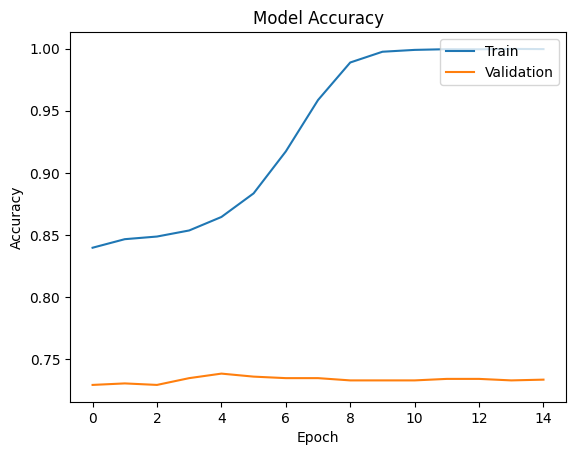

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [48]:
word_index = inp_lang.word_index

word_id = word_index.get('उसकी')
embedding_vector = model.layers[0].get_weights()[0][word_id]
embedding_vector

array([-0.20557392,  0.02509452, -0.12449897,  0.06858157, -0.03675423,
       -0.05321587,  0.07930049, -0.0202131 , -0.00086352, -0.08918883,
        0.01359225, -0.05590185,  0.02405763,  0.00464179, -0.17356016,
       -0.07025839, -0.09434362, -0.01194506, -0.03546066, -0.06022291,
       -0.11207543,  0.00150488, -0.06476936,  0.05505878, -0.02710167,
       -0.01039191,  0.04708542,  0.0135099 , -0.0781884 ,  0.09962796,
        0.12235832,  0.12761696,  0.0205839 ,  0.07887273,  0.07232612,
        0.03079569, -0.05681854, -0.03535054,  0.01227195,  0.04075951,
       -0.13156086,  0.00623206, -0.15351455,  0.08700306, -0.07293443,
        0.06410634, -0.01842663,  0.23189911, -0.05836618,  0.1304543 ,
       -0.08118443,  0.09160038, -0.05204384, -0.06296445,  0.02806626,
        0.06806625, -0.09402934, -0.03303053, -0.08144604,  0.06059707,
       -0.1292475 ,  0.03069099, -0.07183997, -0.0817222 , -0.18585786,
       -0.07846125, -0.05003093, -0.05757577, -0.06003834, -0.00

In [49]:
# Get the embedding matrix from the embedding layer
embedding_matrix = model.layers[0].get_weights()[0]

# Function to find similar words
def find_similar_words(word, word_index, embedding_matrix, top_n=10):
    # Get the embedding for the target word
    word_id = word_index.get(word)
    if word_id is None:
        print(f"'{word}' not found in vocabulary.")
        return []
    
    target_embedding = embedding_matrix[word_id].reshape(1, -1)
    
    # Compute cosine similarities with all other embeddings
    similarities = cosine_similarity(target_embedding, embedding_matrix)[0]
    
    # Get the top N most similar words (excluding the word itself)
    similar_ids = np.argsort(similarities)[::-1][1:top_n+1]
    similar_words = [(id_to_word[i], similarities[i]) for i in similar_ids]
    
    return similar_words

# Create a reverse mapping from indices to words
id_to_word = {index: word for word, index in word_index.items()}

# Example usage: Find words similar to "उसकी"
similar_words = find_similar_words("उसकी", word_index, embedding_matrix)
print(similar_words)

[('समझना', 0.54824203), ('दौड़दौड़कर', 0.52666146), ('कई', 0.5171507), ('चार', 0.48915625), ('पहचान', 0.48531842), ('साथसाथ', 0.48246247), ('घूमघूमकर', 0.47877002), ('चपके', 0.46503702), ('काढ़दिया', 0.46377367), ('कुछ', 0.4533518)]


In [50]:
# Save the model
model.save("models/Part5.h5")

In [51]:
# Load the model to generate sentences
model = load_model("models/Part5.h5")

In [57]:
# Retrieve the embedding layer weights
embedding_matrix = model.layers[0].get_weights()[0]

# Get the word index dictionary
word_index = inp_lang.word_index  # Assuming inp_lang is your tokenizer or vocabulary

# Save the embeddings
with open("embeddings/hindi_word_embeddings_DNN.txt", "w") as file:
    for word, idx in word_index.items():
        # Get the embedding vector for the word
        embedding_vector = embedding_matrix[idx]
        
        # Convert the vector to a space-separated string
        embedding_str = ' '.join(map(str, embedding_vector))
        
        # Write the word and its vector to the file
        file.write(f"{word} {embedding_str}\n")
